In [13]:
'''
Defining relative location of data to current script and other path variables. 
Data file must be placed in a folder labeled data in the same folder as this script.
'''

import glob
import os
from pathlib import Path
import pandas as pd

file_target = '20230714_kinetic_plate_1'

absolute_path = Path().absolute()
data_location = os.path.join(absolute_path, 'xlsx/')
results_location = os.path.join(absolute_path, 'results/')

'''
The following variables define functional classfication parameters as shown on expression plots
'''
NF_DR_mult = 0.3 # max percent difference between states to classify as non-functional; corresponds to DR = (1+x) and DR = 1/(1+x)
SR_val = 0.5 # max relative value to classify as super-repressor
SR_tighten = 0.3 # value between 0 and 1 that tightens the flanks of the super-repressor window. 0 disables.

In [16]:
"""
Input panel: Please ensure values for the following five variables are correct.
############################################
"""

experiment_location = 'C:/Users/JewettLab/Desktop/SLG/GrowthRates/20200225_F6_all_clonal_characterization/'


layout = ('horizontal', 5, '96')     
"""Tuple telling the program basic information about plate layout. Code allows some flexibility for replicate orientation.
(samples in 'vertical' or 'horizontal' replicates, number of replicates per sample, number of wells in plate)"""

    
samples = tuple([])
"""Tuple (immutable list) of sample names. Order is important in this tuple: 
please make sure to list sample names in order, going from top-left to bottom-right of plate"""

# print(samples)


blanks = [x+str(y) for x in ['A','B','C','D','E','F','G','H'] for y in [6,12]]
"""Modified for 384-well plate -- columns 2 and 23 from row B to O are blanks 
"""

# print(blanks)


blank_exceptions = []
"""Use this list to exclude a blank well that, for example, got contaminated."""


"""
End input panel
############################################
"""

"""Double-checking inputs and building sample dictionaries"""

from scipy import stats
import numpy as np
import matplotlib
import pandas as pd
import glob
import os
%matplotlib inline

days = ['Day ' + str(x+1) for x in range(len(glob.glob(data_location + '*.xlsx')))]

def sample_dictionary_maker(layout, samples):
    """
    Input: layout of the 96-well plate, sample names
    Output: dict_samples, a dictionary of {sample: [well,...]} that identifies individual wells by sample
    """
    dict_samples = {}
    
    def sampleator(well_list):
        for sample in samples:
            sample_wells = []
            sample_wells = well_list[samples.index(sample)*layout[1]:(samples.index(sample)+1)*(layout[1])]
            dict_samples[sample] = sample_wells
            
    if layout[2] == '96':
    
        if layout[0] == 'vertical':   
            all_sample_well_list = [x+str(y) for y in list(range(2,12)) for x in ['B','C','D','E','F','G']]
            sampleator(all_sample_well_list)

        if layout[0] == 'horizontal':
            all_sample_well_list = [x+str(y) for x in ['B','C','D','E','F','G'] for y in list(range(2,12))]
            sampleator(all_sample_well_list)
    
    
    if layout[2] == '384':
    
        if layout[0] == 'vertical':   
            all_sample_well_list = [x+str(y) for y in list(range(3,23))\
                                    for x in ['B','C','D','E','F','G','H','I','J','K','L','M','N','O']]
            sampleator(all_sample_well_list)

        if layout[0] == 'horizontal':
            all_sample_well_list = [x+str(y) for x in ['B','C','D','E','F','G','H','I','J','K','L','M','N','O']\
                                    for y in list(range(3,23))]
            sampleator(all_sample_well_list)
    
    return dict_samples, all_sample_well_list

dict_samples, all_sample_well_list = sample_dictionary_maker(layout, samples)


for well in blank_exceptions:
    assert blanks.index(str(well))
    
for well in blanks:
    if well in blank_exceptions:
        blanks.remove(str(well))
        
if (layout[0] == 'vertical' and 6%layout[1] != 0) or (layout[0] == 'horizontal' and 10%layout[1] != 0):
    assert False, 'Did you really lay out the plate like that (with replicates broken between multiple rows/columns)? Seems like more work on your end.'
    #Comment this out if you really did that to yourself

# assert len(samples)*layout[1] == len(all_sample_well_list), 'You need to provide {0} sample names; you gave {1}.'\
# .format(int(len(all_sample_well_list)/layout[1]),len(samples))

if len(samples)*layout[1] != len(all_sample_well_list):
    all_sample_well_list = all_sample_well_list[:len(samples)*layout[1]]
'''Modifies list of sample wells if not all expected sample wells are filled'''

print(dict_samples)
print(all_sample_well_list)

assert(layout[0] == 'horizontal' or layout[0] == 'vertical'), \
'Please input an acceptable layout[0] format: \'horizontal\' or \'vertical\''

assert(layout[2] == '96' or layout[2] == '384'), \
'Please input an acceptable layout[2] format: \'96\' or \'384\''

{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2': []}
['B2

In [80]:
import os

    
def process_excel(filename, blanks):
    """
    Input: filename of an excel file generated by the generic plate reader export for a 96-well plate
    Output: {sample: [well identities],...}, pd.dataframe with kinetic data generated from default plate reader excel export
    """
    
  
    df_kinetic_OD = pd.read_excel(filename, skiprows=2, usecols = 'A,C:CT', skipfooter = 159)
    df_kinetic_FL = pd.read_excel(filename, skiprows=151, usecols = 'A,C:CT', skipfooter = 10)
    
#     print(df_kinetic_OD)
#     print(df_kinetic_FL)
    def get_hrs(time_str):
        h, m, s = time_str.split(':')
        ms = round(int(m) + int(s)/60)
        
        return ((int(h) + round(int(ms))/60))
    
    for assay in [df_kinetic_OD, df_kinetic_FL]:
        hrs_list = []
        for time in assay['Time']:
            hrs_list.append(get_hrs(str(time)))
        assay['hrs'] = hrs_list
    
    print(df_kinetic_OD)
    print(df_kinetic_FL)
    return df_kinetic_OD, df_kinetic_FL
    

for file in glob.glob(data_location + '*.xls*'):
    if '.xlsx' in file and file_target in file:
        df_kinetic_OD, df_kinetic_FL = process_excel(file, blanks)
print(df_kinetic_OD.iloc[:, 13:25])
# print(df_kinetic)
# print(dict_samples)

         Time      A1      A2      A3      A4      A5      A6      A7      A8  \
0    00:00:00  0.1993  0.1856  0.1946  0.2109  0.1836  0.1877  0.2073  0.2206   
1    00:09:52  0.1984  0.1854  0.1953  0.2071  0.1840  0.1850  0.2071  0.2198   
2    00:19:52  0.1970  0.1860  0.1928  0.2058  0.1835  0.1855  0.2061  0.2216   
3    00:29:52  0.1971  0.1850  0.1930  0.2048  0.1840  0.1840  0.2049  0.2167   
4    00:39:52  0.1969  0.1858  0.1903  0.2038  0.1841  0.1840  0.2029  0.2185   
..        ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  23:19:52  0.5821  0.5742  0.5795  0.5941  0.5819  0.1660  0.5967  0.5924   
141  23:29:53  0.5839  0.5759  0.5810  0.5963  0.5825  0.1663  0.5985  0.5937   
142  23:39:53  0.5853  0.5769  0.5818  0.5975  0.5840  0.1661  0.5994  0.5949   
143  23:49:53  0.5873  0.5789  0.5838  0.5992  0.5861  0.1663  0.6010  0.5953   
144  23:59:53  0.5878  0.5796  0.5836  0.5999  0.5858  0.1665  0.6016  0.5965   

         A9  ...      H4   

In [32]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
print(tuples)
index1 = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index2 = pd.MultiIndex.from_tuples(tuples, names=['third', 'fourth'])

s1 = pd.DataFrame(np.random.randn(8), index=index1, columns=['s1'])
s2 = pd.DataFrame(np.random.randn(8), index=index2, columns=['s2'])
print(s1)
print(s2)

well_list = df_kinetic_OD.index
print(well_list)


[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
                    s1
first second          
bar   one    -2.394989
      two     0.694900
baz   one    -0.052078
      two    -0.230834
foo   one    -1.063355
      two    -0.225988
qux   one    -1.495880
      two     0.560602
                    s2
third fourth          
bar   one     1.047288
      two     0.595546
baz   one     0.960186
      two     0.517304
foo   one    -1.542662
      two    -0.756383
qux   one    -0.428597
      two     1.199220


NameError: name 'df_kinetic_OD' is not defined

In [78]:
from math import log
import math
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import os

dict_samples, all_sample_well_list = sample_dictionary_maker(layout, samples)

def well_fitter(df_kinetic, well):

    def find_linear_regime(xData, yData, windowSize):
        '''
        Adapted from old code by Adam Hockenberry (I think?) for EDC. He had suggested using a window size of 5-10 
        which I don't really like because it doesn't capture enough of the curve and is prone to local effects
        
        I also took out a part of the code that I think biased toward higher slopes and I force the fit to 
        work over an OD600 window that corresponds to typical exponential phase, 
        which is currently: [min: (-inf, ~0.135), max: (0.368, 1.0)]
        '''
        
        R2s = []
        slopes = []
        ps = []
        intercepts = []
        errors = []
        
        for i in range(len(xData)-windowSize):
            tempX = xData[i:i+windowSize]
            tempY = np.log(yData[i:i+windowSize])
            a,b,c,d,e = stats.linregress(tempX, tempY)
            R2s.append(c**2)
            slopes.append(a)
            ps.append(d)
            intercepts.append(b)
            errors.append(e)
            
        bestSlope = 0.
        bestR2 = 0.
        bestP = 0.
        bestInt = 0.
        bestError = 0.
        linearRegime = ['']
        
        for i in range(len(slopes)):
            if np.log(yData[i]) + 1.5 < np.log(yData[i+windowSize]) and -3 < np.log(yData[i+windowSize]):
                if R2s[i] > bestR2:
                    bestSlope = slopes[i]
                    linearRegime = [xData[i],xData[i+windowSize]]
                    bestR2 = R2s[i]
                    bestP = ps[i]
                    bestInt = intercepts[i]
                    bestError = errors[i]

        return bestSlope, linearRegime, bestR2, bestP, bestInt, bestError, windowSize

    correlation_list = []

    for windowSize in range(8,20,1):
        correlation_list.append(find_linear_regime(df_kinetic['hrs'], df_kinetic[well], windowSize))

    max_corr = 0
    best_fit = []

    for i in correlation_list:
        if i[2] > max_corr:
            max_corr = i[2]
            best_fit = i
    
    return best_fit

def platonator(dict_samples, df_kinetic):
    
    params = ('best_slope', 'hrs_window', 'R2', 'Pvalue', 'intercept', 'error','windowSize')
    df_sparams = pd.DataFrame(index = params, columns = df_kinetic.columns)
    
    for sample in dict_samples:
        for well in dict_samples[sample]:
            if well in df_kinetic.columns:
                print(well)
                param_well = well_fitter(df_kinetic, well)
                if param_well == []:
                    print('yeet '+ well)
#                     dict_samples[sample].pop(dict_samples[sample].index(well))
                    print(dict_samples)
                    print(param_well)
                else:
                    df_sparams[well] = param_well
    
    df_sparams = df_sparams.dropna(axis=1)
    
    return dict_samples, df_sparams

# print(df_kinetic)
dict_samples, df_sparams = platonator(dict_samples, df_kinetic_OD)
# dict_samples, df_sparams = platonator(dict_samples, df_kinetic.iloc[:,-30:])
# print(dict_samples)
# print(df_sparams)

# curve_plotter(df_sparams, df_kinetic, dict_samples, '1')



B2
yeet B2
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2

yeet B11
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2':

yeet C10
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2':

yeet D9
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2': 

yeet E8
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2': 

yeet F7
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2': 

yeet G6
{'starting strain': ['B2', 'B3', 'B4', 'B5', 'B6'], 'F6A1': ['B7', 'B8', 'B9', 'B10', 'B11'], 'F6B1': ['C2', 'C3', 'C4', 'C5', 'C6'], 'F6C1': ['C7', 'C8', 'C9', 'C10', 'C11'], 'F6D1': ['D2', 'D3', 'D4', 'D5', 'D6'], 'F6E1': ['D7', 'D8', 'D9', 'D10', 'D11'], 'F6F1': ['E2', 'E3', 'E4', 'E5', 'E6'], 'F6G1': ['E7', 'E8', 'E9', 'E10', 'E11'], 'F6H1': ['F2', 'F3', 'F4', 'F5', 'F6'], 'F6I1': ['F7', 'F8', 'F9', 'F10', 'F11'], 'F6J1': ['G2', 'G3', 'G4', 'G5', 'G6'], 'F6K1': ['G7', 'G8', 'G9', 'G10', 'G11'], 'F6L1': [], 'F6M1': [], 'F6N1': [], 'F6O1': [], 'F6P1': [], 'F6Q1': [], 'F6R1': [], 'F6S1': [], 'F6T1': [], 'F6U1': [], 'F6V1': [], 'F6W1': [], 'F6X1': [], 'F6Y1': [], 'F6Z1': [], 'F6A2': [], 'F6B2': [], 'F6C2': [], 'F6D2': [], 'F6E2': [], 'F6F2': [], 'F6G2': [], 'F6H2': [], 'F6I2': [], 'F6J2': [], 'F6K2': [], 'F6L2': [], 'F6M2': [], 'F6N2': [], 'F6O2': [], 'F6P2': [], 'F6Q2': [], 'F6R2': [], 'F6S2': [], 'F6T2': [], 'F6U2': [], 'F6V2': [], 'F6W2': [], 'F6X2': [], 'F6Y2': [], 'F6Z2': 

In [4]:
import numpy as np
from statistics import stdev

def param_means_stds(df_param, dict_samples):
    """
    Input: df_sparams as generated by the curve_fitter function
    Outputs: dataframes for each curve fit parameter average and standard deviation, grouped by sample
    """
    df_means = pd.DataFrame(index = days, columns = samples)
    df_stds = pd.DataFrame(index = days, columns = samples)
    for sample in dict_samples:
        for day in df_means.index:
            df_means[sample].loc[day] = df_param[dict_samples[sample]].loc[day].mean()
        for day in df_stds.index:
            df_stds[sample].loc[day] = df_param[dict_samples[sample]].loc[day].std()
        
    return df_means, df_stds

# df_k_means_stds = param_means_stds(df_k_inds, dict_samples)


In [84]:
#Plotting module

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"


def colorator(samples, doctors_order):
    """
    Input: A list of samples for which to generate a list of evenly-spaced colors. 
    Currently assumes second half of list is negative control. Might expand this later to generate more palette options, idk
    
    Output: A list of evenly spaced colors over red (experimental) and grey (NC) color ranges
    """
    import matplotlib.pyplot as plt
    
    if doctors_order == 1:
        cmE = plt.cm.get_cmap('Reds')
        cmNC = plt.cm.get_cmap('Greys')

        colors = []
        extremeification = 0.5 #value between 0 and 1 for how divergent from central color the range should be
        central_color = 0.7 #value between 0 and 1 for where on color axis (i.e., how saturated) central color should be

        for i in samples[:int(len(samples)/2)]:
            j = (samples.index(i))/(len(samples)/2)
            colors.append(cmE(j+(central_color-j)*(1-extremeification)))

        for i in samples[int(len(samples)/2):]:
            j = (samples.index(i)-len(samples)/2)/(len(samples)/2)
            colors.append(cmNC(j+(central_color-j)*(1-extremeification)))
            
    if doctors_order == 2:
        cmE = plt.cm.get_cmap('Reds')
        cmNC = plt.cm.get_cmap('Greys')

        colors = []
        extremeification = 0.5 #value between 0 and 1 for how divergent from central color the range should be
        central_color = 0.7 #value between 0 and 1 for where on color axis (i.e., how saturated) central color should be
        
        colors.append(cmNC(central_color))

        for i in samples[1:]:
            j = samples.index(i)/(len(samples)-1)
            colors.append(cmE(j+(central_color-j)*(1-extremeification)))
        
        
    return colors

colors = colorator(samples, 2)
# print(df_sparams)

def curve_plotter(df_sparams, df_kinetic, dict_samples, day):
    """
    Input: Dataframes with important data
    
    Output: Plot of all sigmoid fits from one plate; plots of individual samples grouped in replicates
    """   
    import matplotlib.pyplot as plt
    import numpy as np
    from cycler import cycler
    
    xspace = np.linspace(0, max(df_kinetic['hrs']), len(df_kinetic.hrs)*5)
    plt.figure()
    
    colors = colorator(samples, 1)
    
    
    def g(xspace, df_sparams, well):
        df_col = df_sparams[well]
        return np.exp(df_col.loc['best_slope']*xspace+df_col.loc['intercept'])
    
    def plot_ind_fits():
        
        for i, well in enumerate(df_sparams):
            df_k = pd.concat([df_kinetic['hrs'], df_kinetic[well]], axis = 1)
            
            time_window = df_sparams[well].loc['hrs_window']
            xspace =  np.linspace(time_window[0], time_window[1], (time_window[1]-time_window[0])*20)

            fig = plt.figure(figsize=(7,10))
            ax1 = fig.add_subplot(2,1,1)
            ax1.set_xlabel('Time (hrs)', fontsize=16)
            ax1.set_ylabel('OD600', fontsize=16)
            ax1.set_title(well + ', ' + day, fontsize=20)
            
            plt.plot(xspace, g(xspace, df_sparams, well),\
                     color='k', linewidth=2.5)
            plt.plot(df_k['hrs'], df_k.iloc[:,1:], color = colors[int(well[1:])-2])      
        
            ax2 = fig.add_subplot(2,1,2)
            ax2.set_xlabel('Time (hrs)', fontsize=16)
            ax2.set_ylabel('ln(OD600)', fontsize=16)
            ax2.set_title(well + ', ' + day, fontsize=20)
            
            plt.plot(xspace, df_sparams[well].loc['best_slope']*xspace+df_sparams[well].loc['intercept'],\
                     color='k', linewidth=2.5)
            plt.plot(df_k['hrs'], np.log(df_k.iloc[:,1:]), color = colors[int(well[1:])-2])
            
            plt.tight_layout()
            
    def plot_replicate_fits():
        
        F6_samples = ['starting strain','F6F1','F6B2','F6D2','F6U1','F6Z2']
        F6_color = colorator(F6_samples, 2)
        h = 0

        for sample in dict_samples:
            
            sample_pub_translations = {'starting strain':'g43', 'F6F1':'F6CS.1', 'F6B2':'F6CS.2', 'F6D2':'F6CS.3', 'F6U1':'F6CS.4', 'F6Z2':'F6CS.5'}
            
            print(sample)
            
            for well in dict_samples[sample]:
                if well not in df_sparams:
                    dict_samples[sample].remove(well)
                    
            fig = plt.figure(figsize=(3.5,5))
            fig.patch.set_facecolor('lightgray')
            ax1 = fig.add_subplot(2,1,1)
            ax1.set_xlabel('Time (hrs)', fontsize=12)
            ax1.set_ylabel('OD600', fontsize=12)
            ax1.set_title(sample_pub_translations[sample] + ', exponential', fontsize=15)

            ax2 = fig.add_subplot(2,1,2)
            ax2.set_xlabel('Time (hrs)', fontsize=12)
            ax2.set_ylabel('ln(OD600)', fontsize=12)
            ax2.set_title(sample_pub_translations[sample] + ', linear', fontsize=15)
      
  
            for i, well in enumerate(dict_samples[sample]):
                print(i, well)
#                 print(df_sparams)
                df_k = pd.concat([df_kinetic['hrs'], df_kinetic[well]], axis = 1)

                time_window = df_sparams[well].loc['hrs_window']
                xspace =  np.linspace(time_window[0], time_window[1], (time_window[1]-time_window[0])*20)


                ax1.plot(xspace, g(xspace, df_sparams, well),\
                     color='k', linewidth=2.5)
                ax1.plot(df_k['hrs'], df_k.iloc[:,1:], color = F6_color[h])      
        

                ax2.plot(xspace, df_sparams[well].loc['best_slope']*xspace+df_sparams[well].loc['intercept'],\
                         color='k', linewidth=2.5)
                ax2.plot(df_k['hrs'], np.log(df_k.iloc[:,1:]), color = F6_color[h])
            
            plt.tight_layout()
            
            h+=1
            
#     plot_ind_fits()
    plot_replicate_fits()
    
# dict_published_set = {key: dict_samples[key] for key in ['starting strain','F6F1','F6B2','F6D2','F6U1','F6Z2']}

# curve_plotter(df_sparams, df_kinetic, dict_published_set, '1')  


def bar_plotter(df_means_stds, colors, title, ylabel, ylim, ordered=False):
    """
    Input: df_param_means_stds, colors
    Output: Bar plots of each parameter with error bars as standard deviations
    """
    import matplotlib.pyplot as plt
    
    plt.style.use('default')
    font_size = 8
    
    fig = plt.figure(figsize=(7,5))

    ax1 = fig.add_subplot(1,1,1)
    
    ax1.set_ylim(ylim)
    
    print(colors)
    
    if ordered==False:
        for sample in df_means_stds.columns:
            ax1.bar(sample, df_means_stds[sample].iloc[0], align='center', yerr = df_means_stds[sample].iloc[1],\
                capsize=3.5,\
                    color=colors\
                   )
        ax1.set_xticklabels(df_means_stds.columns, rotation = 90, fontsize = font_size*1.4)

    if ordered==True:
        ax1.bar(df_means_stds.columns, df_means_stds.iloc[0], align='center', yerr = df_means_stds.iloc[1],\
                capsize=3.5,\
                    color=colors)
        ax1.set_xticklabels(df_means_stds.columns, rotation = 90, fontsize = font_size*1.4)

    ax1.set_xlabel('Sample', fontsize = font_size*1.5)
    ax1.set_ylabel(ylabel, fontsize = font_size*1.5)
    ax1.set_title(title, fontsize = font_size*1.5)
    
    plt.tight_layout()
    plt.show()

# bar_plotter(df_param_means, df_param_stds, colors)

def line_plotter(df_all_k_avg, df_all_k_std):
    """
    Input: pd.dataframes for each parameter average and standard deviation, indexed by plate or day
    
    Output: Line plot for each parameter
    """
    import matplotlib.pyplot as plt      
    
    plt.style.use('default')
    font_size = 8
    colors = colorator(samples, 1)
    
    def grouped_replicates():
        """Graphs individually-passaged replicates together"""
        ax = df_all_k_avg.plot(yerr = df_all_k_std, color = colors, capsize=3.5, figsize=(15,6))
        ax.legend(bbox_to_anchor=(1.4, 0.9))
        ax.set_xlabel('Days of consecutive passaging', fontsize = font_size*1.6)
        ax.set_ylabel('Growth rate (/hr)', fontsize = font_size*2)
        ax.set_title('Growth rate of ESW fits', fontsize = font_size*2.5)

    def grouped_replicates_control_split():
        """Graphs individually-passaged replicates together"""
        ax1 = df_all_k_avg.iloc[:,:5].plot(yerr = df_all_k_std.iloc[:,:5], color = colors, capsize=3.5)
        ax1.legend(bbox_to_anchor=(1.4, 0.9))
        ax1.set_xlabel('Days of consecutive passaging', fontsize = font_size*1.6)
        ax1.set_ylabel('Growth rate (/hr)', fontsize = font_size*2)
        ax1.set_title('Growth rate of ESW fits', fontsize = font_size*2.5)
        ax1.set_ylim(0.1,0.9) 
        
        ax2 = df_all_k_avg.iloc[:,5:].plot(yerr = df_all_k_std.iloc[:,5:], color = colors[5:], capsize=3.5)
        ax2.legend(bbox_to_anchor=(1.4, 0.9))
        ax2.set_xlabel('Days of consecutive passaging', fontsize = font_size*1.6)
        ax2.set_ylabel('Growth rate (/hr)', fontsize = font_size*2)
        ax2.set_title('Growth rate of ESW fits', fontsize = font_size*2.5)
        ax2.set_ylim(0.1,0.9) 
        
    def individual_wells():
        """Graphs lineage of each well, colored by replicate"""
        
        ax = df_k_inds.plot(color = colors)
        ax.legend(bbox_to_anchor=(1.4, 0.9))
        
        ax.set_xlabel('Days of consecutive passaging', fontsize = font_size*1.6)
        ax.set_ylabel('Growth rate (/hr)', fontsize = font_size*2)
        ax.set_title('Growth rate of ESW fits', fontsize = font_size*2.5)
        
        
    grouped_replicates()
    grouped_replicates_control_split()
    individual_wells()
    
# line_plotter(df_all_L_avg, df_all_L_std, df_all_k_avg, df_all_k_std, df_all_x0_avg, df_all_x0_std)

C:/Users/JewettLab/Desktop/SLG/GrowthRates/20200225_F6_all_clonal_characterization/data\20200226_all_F6_clones_take1.xlsx
{'starting strain': ['B3', 'B4', 'B5', 'B6', 'B7'], 'F6F1': ['C13', 'C14', 'C15', 'C16', 'C17'], 'F6B2': ['I3', 'I4', 'I5', 'I6', 'I7'], 'F6D2': ['I13', 'I14', 'I15', 'I16', 'I17'], 'F6U1': ['G8', 'G9', 'G10', 'G11', 'G12'], 'F6Z2': ['O3', 'O4', 'O5', 'O6', 'O7']}
B3
B4
B5
B6
B7


C:\Users\JewettLab\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log
C:\Users\JewettLab\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log


C13
C14
C15
C16
C17
yeet C17
{'starting strain': ['B3', 'B4', 'B5', 'B6', 'B7'], 'F6F1': ['C13', 'C14', 'C15', 'C16', 'C17'], 'F6B2': ['I3', 'I4', 'I5', 'I6', 'I7'], 'F6D2': ['I13', 'I14', 'I15', 'I16', 'I17'], 'F6U1': ['G8', 'G9', 'G10', 'G11', 'G12'], 'F6Z2': ['O3', 'O4', 'O5', 'O6', 'O7']}
[]
I3
I4
I5
I6
I7
I13
I14
I15
I16
I17
G8
G9
G10
G11
G12
O3
O4
O5
O6
O7
{'starting strain': ['B3', 'B4', 'B5', 'B6', 'B7'], 'F6F1': ['C13', 'C14', 'C15', 'C16', 'C17'], 'F6B2': ['I3', 'I4', 'I5', 'I6', 'I7'], 'F6D2': ['I13', 'I14', 'I15', 'I16', 'I17'], 'F6U1': ['G8', 'G9', 'G10', 'G11', 'G12'], 'F6Z2': ['O3', 'O4', 'O5', 'O6', 'O7']}                                                  B3  \
best_slope                                 0.512192   
hrs_window  [0.9497222222222222, 4.199722222222222]   
R2                                         0.999704   
Pvalue                                  9.18638e-21   
intercept                                  -4.22432   
error                                   

C:\Users\JewettLab\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Users\JewettLab\Anaconda3\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: invalid value encountered in log


F6B2
0 I3
1 I4
2 I5
3 I6
4 I7
F6D2
0 I13
1 I14
2 I15
3 I16
4 I17
F6U1
0 G8
1 G9
2 G10
3 G11
4 G12
F6Z2
0 O3
1 O4
2 O5
3 O6
4 O7


<Figure size 432x288 with 0 Axes>

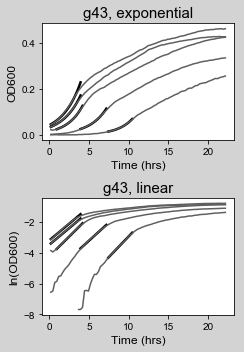

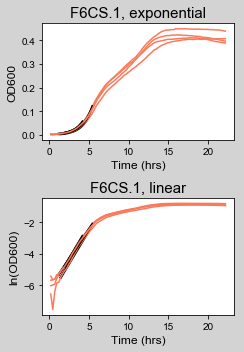

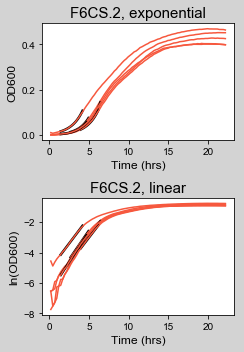

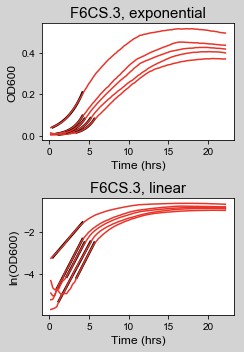

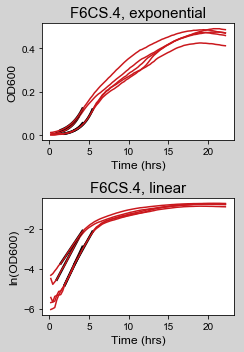

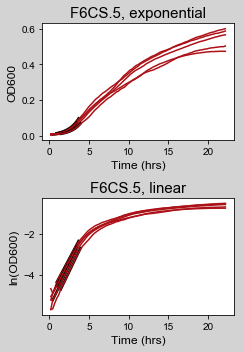

In [85]:
days = ['Day ' + str(x+1) for x in range(len(glob.glob(data_location + '*.xlsx')))]

def gathering_pandas(df, df_sparams, day, parameter):
    """This gathers data in the for loop for line plots."""
    df.loc[day] = df_sparams.loc[parameter]
    return df

def file_compiler(data_location, dict_samples):
    """
    Input: [files]
    Output: Runs entire code and outputs bar graphs for each curve fit parameter for each plate, grouped by sample.
    Also generates dataframes for each parameter average and parameter std deviation for line plotting.
    """
    import glob
    import pandas as pd
    import random
    
    df_k_inds = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_window_locs = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_R2 = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_Pvals = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_ints = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_m_errs = pd.DataFrame(index = days, columns = all_sample_well_list)
    df_window_sizes = pd.DataFrame(index = days, columns = all_sample_well_list)
    
    dfs = [df_k_inds, df_window_locs, df_R2, df_Pvals, df_ints, df_m_errs, df_window_sizes]
    dfs_keys = ['best_slope', 'hrs_window', 'R2', 'Pvalue', 'intercept', 'error', 'windowSize']
 
    i=0
    
    for file in glob.glob(data_location + '*.xlsx'):
        print(file)
        
        df_kinetic = process_excel(file, blanks)
#         print(df_kinetic)

        dict_published_set = {key: dict_samples[key] for key in ['starting strain','F6F1','F6B2','F6D2','F6U1','F6Z2']}
        print(dict_published_set)
        
        dict_samples, df_sparams = platonator(dict_published_set, df_kinetic)
    
        print(dict_samples, df_sparams)
        
        for df, key in zip(dfs, dfs_keys):
            df = gathering_pandas(df, df_sparams, days[i], key)
                
        curve_plotter(df_sparams, df_kinetic, dict_samples, days[i])
        
        
        i+=1
        
    return dfs, dict_samples

dict_samples, all_sample_well_list = sample_dictionary_maker(layout, samples)
dfs, dict_samples = file_compiler(data_location, dict_samples)

df_k_inds = dfs[0]
df_window_locs = dfs[1]
df_R2 = dfs[2]
df_Pvals = dfs[3]
df_ints = dfs[4]
df_m_errs = dfs[5]
df_window_sizes = dfs[6]


df_lag_time = -df_ints/df_k_inds




In [15]:
# print(df_k_inds.iloc[:,195:200])
# print(df_lag_time.iloc[:,195:200])

# print(df_k_inds)
# print(df_lag_time)
curve_plotter(df_sparams, df_kinetic, dict_samples, days[i])


NameError: name 'df_sparams' is not defined

In [ ]:
def plotter(df_inds, title, ylabel, ylim):

    df_all_avg, df_all_std = param_means_stds(df_inds, dict_samples)

    print(df_all_avg.index)
    for day in df_all_avg.index:
        df_day = pd.concat((df_all_avg.loc[day], df_all_std.loc[day]), keys=['y','yvar'], axis=1)\
            .sort_values(by='y', ascending=True).T
#         df_day = df_day.set_index()

       
#         cols = list(df_day.columns.values)
#         cols.insert(0, cols[-1])
#         if cols[-1] == 'starting strain':
#             cols.pop(-1)
#         print(cols)
#         df_day = df_day[cols]

        F6_samples = ['starting strain','F6F1','F6B2','F6D2','F6U1','F6Z2']
        print(df_day[F6_samples]) 
        F6_color = colorator(F6_samples, 2)
        bar_plotter(df_day[F6_samples], F6_color, title, ylabel, ylim, ordered=True)

#     line_plotter(df_all_avg, df_all_std)
    
plotter(df_k_inds, 'Growth rates of F6-counterselected clones', 'Growth rate (/hr)', (0,1.0))
# plotter(df_lag_time, 'Lag time', 'Lag time (hrs)', (0,20))

In [ ]:
from scipy import stats

def ttester(df_inds):
    
    df_all_avg, df_all_std = param_means_stds(df_inds, dict_samples)
    
    for day in df_all_avg.index:
        df_day = pd.concat((df_all_avg.loc[day], df_all_std.loc[day]), keys=['y','yvar'], axis=1)\
            .sort_values(by='y', ascending=True).T
        print(df_day.loc[:,col])
    
    print(df_day)

ttester(df_k_inds)

In [ ]:
print(dict_samples)

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")

print(df_k_inds)
# sns.barplot(x="day", y="total_bill", data=df_k_inds, capsize=.1, ci="sd")
# sns.swarmplot(x="day", y="total_bill", data=df_k_inds, color="0", alpha=.35)

plt.show()

In [ ]:
"""
Generates dataframes of growth rates across days for individual replicates of each sample
Generates scatterplots for each individual well lineage
"""

def lineage_plotter(df_k_inds):
    
    import glob
    import seaborn as sns
    from scipy import stats

    colors = colorator(samples, 1)
    days = ['Day ' + str(x+1) for x in range(len(glob.glob(data_location + '*.xlsx')))]
    days_list = []

    for x in range(len(glob.glob(data_location + '*.xlsx'))):
        days_list.append(x+1)

    for sample in dict_samples:
        j=0

        column_list = []
        growth_by_sample = []

        for well in dict_samples[sample]:
            growth_by_sample.append(list(df_k_inds[well]))
            column_list = dict_samples[sample]
            df = pd.concat((pd.Series(days_list),df_k_inds[well]), axis=1, keys = ('Days', well))

        df = pd.DataFrame(growth_by_sample, columns=days_list, index=dict_samples[sample]).T

        print(sample)
        print(df)
        print()

        for column in df.columns:
            df_concat = pd.concat((pd.Series(days_list), df[column]), axis=1, keys = ('Days', well))
            df_well = pd.DataFrame({'Days': days_list, column: df[column]})

            ax = df_well.plot(kind='scatter', x='Days', y=column, color = colors[samples.index(sample)])

            ax.set_title(sample + ' ' + dict_samples[sample][j])
            ax.set_ylabel('Growth rate (/hr)')
            ax.set_ylim(0,1.0)

            j+=1

lineage_plotter(df_k_inds)

In [ ]:
import pandas as pd
def scatterman(df):
    """Groups replicates by sample, does linear regressions and scatter plots"""

    import glob
    import seaborn as sns
    from scipy import stats
    
    def mpl_scatterator(df, colors_i, title, ylim):
        font_size = 8
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        print(df)
        df.plot.scatter(x='Days', y='Growth Rates', color = colors[colors_i], ax=ax)
        ax.set_title(title, fontsize=font_size*3)
        ax.set_xlabel('Days', fontsize=font_size*2)
        ax.set_ylabel('Growth rate (/hr)', fontsize=font_size*2)
        ax.set_ylim(ylim)
        
    def sns_scatterator(df, colors_i, title, ylim):
        font_size = 8
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        sns.regplot(x='Days', y = 'Growth Rates', data = df, color = colors[colors_i])
        ax.set_title(title, fontsize=font_size*3)
        ax.set_xlabel('Days', fontsize=font_size*2)
        ax.set_ylabel('Growth rate (/hr)', fontsize=font_size*2)
        ax.set_ylim(ylim)

    def show_me_the_stats(df, sample):
        a,b,c,d,e = stats.linregress(x = df['Days'], y = df['Growth Rates'])
        df_stats = pd.DataFrame({'slope': [a], 'y-int': [b], 'R': [c], 'R^2': [c**2], \
                                 'p': [d], 'std_e': [e]}, index=[sample])
        print(df_stats)
        print()
        
        return df_stats
    
    days = ['Day ' + str(x+1) for x in range(len(glob.glob(data_location + '*.xlsx')))]
    days_list = []

    for x in range(len(glob.glob(data_location + '*.xlsx'))):
        days_list.append(x+1)

    df_days = pd.DataFrame({'Days': days_list}, index = days)

    colors = colorator(samples, 1)

    df_33 = pd.DataFrame()
    df_28 = pd.DataFrame()
    

    for sample in dict_samples:

        growth_by_sample = []
        df_sample_rates = pd.DataFrame()

        for well in dict_samples[sample]:
            
###### THIS DAMN LINE IN CURRENTLY BROKEN FOR NO OTHER REASON THAN BEING A PIECE OF SHIT
###### FEEL FREE TO CALL IT BAD NAMES AND CURSE ITS MOTHER
            df_well_rates = pd.concat((df_days, df_k_inds[well]), axis=1)
            df_well_rates.columns = ['Days', 'Growth Rates']
            
#             for i in df_well_rates['Growth Rates']:
#                 print(type(i))
#                 i = int(i)
            print(df_well_rates)
            
            df_sample_rates = pd.concat((df_sample_rates, df_well_rates))

            if sample[:3] == 'p33':
                df_33 = pd.concat((df_33, df_well_rates))
            if sample[:3] == 'p28':
                df_28 = pd.concat((df_28, df_well_rates))

            growth_by_sample.append(list(df_k_inds[well]))

        font_size = 8

        mpl_scatterator(df_sample_rates, samples.index(sample), sample, (0.1,0.9))
        sns_scatterator(df_sample_rates, samples.index(sample), sample, (0.1,0.9))
        
        show_me_the_stats(df_sample_rates, sample)
    print(df_33)
    mpl_scatterator(df_33, 3, 'All p33 cultures', (0.1,0.9))
    mpl_scatterator(df_28, 8, 'All p28 cultures', (0.1,0.9))
    
    sns_scatterator(df_33, 3, 'All p33 cultures', (0.1,0.9))
    sns_scatterator(df_28, 8, 'All p28 cultures', (0.1,0.9))
        
    show_me_the_stats(df_33, 'All p33 cultures')
    show_me_the_stats(df_28, 'All p28 cultures')

# print(df_k_inds)
scatterman(df_k_inds)
# scatterman(df_R2)

In [ ]:
def correlator(df_all_k_avg):
    """
    Input: A dataframe containing average growth rates for each sample condition for each day
    Output: Linear regression parameters for each condition
    """

    from scipy import stats

    for column in df_all_k_avg:

        counter = []
        for i in range(len(df_all_k_avg[column])):
            counter.append(i)
        print(column)
        a,b,c,d,e = stats.linregress(counter, list(df_all_k_avg[column].values))
        print(a,b,c**2,d,e)
        print()

correlator(df_all_k_avg)


In [ ]:
print(df_all_k_avg)
print(df_all_k_std)

print(df_all_k_avg.loc['Day 1'])
for growthrate in df_all_k_avg.loc['Day 1']:
    print(growthrate)


df_mean_stats = pd.concat((df_all_k_avg.iloc[0],df_all_k_avg.iloc[-1], df_all_k_std.iloc[0], df_all_k_std.iloc[-1]), axis=1)
df_mean_stats.columns = ['Day 1 means', 'Day 13 means', 'Day 1 stds', 'Day 13 stds']
print(df_mean_stats)



In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
lin_reg = sns.regplot(x='Days', y = 'Growth Rates', data = df_33, color = colors[4])
ax.set_title('All p33 cultures', fontsize=font_size*3)

ax.set_xlabel('Days', fontsize=font_size*2)
ax.set_ylabel('Growth Rate', fontsize=font_size*2)
ax.set_ylim(0.1,0.9)


fig = plt.figure(2)
ax = fig.add_subplot(1,1,1)
lin_reg = sns.regplot(x='Days', y = 'Growth Rates', data = df_28, color = colors[9])
ax.set_title('All p28 cultures', fontsize=font_size*3)

ax.set_xlabel('Days', fontsize=font_size*2)
ax.set_ylabel('Growth Rate', fontsize=font_size*2)
ax.set_ylim(0.1,0.9)

In [ ]:
import numpy as np

p33_wells = []
p28_wells = []

for well in all_sample_well_list:
    if well[1] in ['2','3','4','5','6']:
        p33_wells.append(well)
    if well[1] in ['7','8','9'] or well[1:3] in ['10','11']:
        p28_wells.append(well)

        
print(p33_wells)
print(p28_wells)

all_p33_ks_initial = []
all_p33_ks_final = []
all_p28_ks_initial = []
all_p28_ks_final = []

for column in df_k_inds.columns:
    if column in p33_wells:
        all_p33_ks_initial.append(df_k_inds[column].iloc[0])
        all_p33_ks_final.append(df_k_inds[column].iloc[-1])
    if column in p28_wells:
        all_p28_ks_initial.append(df_k_inds[column].iloc[0])
        all_p28_ks_final.append(df_k_inds[column].iloc[-1])        


# print(df_k_inds)
# print(all_p33_ks_initial)
# print(all_p33_ks_final)
# print(all_p28_ks_initial)
# print(all_p28_ks_final)
# print(len(all_p33_ks_initial))
# print(len(all_p33_ks_final))
# print(len(all_p28_ks_initial))
# print(len(all_p28_ks_final))

print(np.mean(all_p33_ks_initial))
print(np.std(all_p33_ks_initial))
print()
print(np.mean(all_p33_ks_final))
print(np.std(all_p33_ks_final))
print()
print(np.mean(all_p28_ks_initial))
print(np.std(all_p28_ks_initial))
print()
print(np.mean(all_p28_ks_final))
print(np.std(all_p28_ks_final))


plt.style.use('default')
font_size = 8
colors = colorator(samples, 1)

fig = plt.figure(figsize=(5,5.3))

ax1 = fig.add_subplot(1,1,1)

ax1.set_ylim(0,0.8)

ax1.bar(['All p33 cultures, initial', 'All p33 cultures, final', 'All p28 cultures, initial', 'All p28 cultures, final'], \
        [np.mean(all_p33_ks_initial), np.mean(all_p33_ks_final), np.mean(all_p28_ks_initial), np.mean(all_p28_ks_final)], \
        align='center', \
        yerr = [np.std(all_p33_ks_initial), np.std(all_p33_ks_final), np.std(all_p28_ks_initial), np.std(all_p28_ks_final)],\
        capsize=3.5, color=[colors[2],colors[4],colors[7],colors[9]])

ax1.set_xticklabels(['p33, Day 1', 'p33, Day 13', 'p28, Day 1', \
                     'p28, Day 13'], rotation = 90, fontsize = font_size*1.5)
ax1.set_xlabel('Sample', fontsize = font_size*2)
ax1.set_ylabel('Growth rate (/hr)', fontsize = font_size*2)
ax1.set_title('Initial and final growth rates', fontsize = font_size*2.5)

plt.tight_layout()
plt.show()


In [ ]:
line_plotter(df_all_k_avg, df_all_k_std)

In [ ]:
ls